# Predict the stock price using Ridge Regression

In [2]:
# Import libraries

import yfinance as yf

In [4]:
# Download the data from Yahoo Finance

tickers = ['AAPL', 'AMZN', 'MSFT', 'QQQ', '^GSPC']
df = yf.download(tickers, start = '2020-01-01', end = '2025-04-01')['Close']
df.head()

C:\Users\sahil\AppData\Local\Temp\ipykernel_13596\178316247.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(tickers, start = '2020-01-01', end = '2025-04-01')['Close']
[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC
Date,,,,,
2020-01-02,72.538521,94.900497,152.791107,208.848953,3257.850098
2020-01-03,71.833282,93.748497,150.888580,206.935867,3234.850098
2020-01-06,72.405685,95.143997,151.278595,208.269241,3246.280029
2020-01-07,72.065147,95.343002,149.899307,208.240280,3237.179932
2020-01-08,73.224419,94.598503,152.286972,209.805435,3253.050049


In [6]:
# Feature Engineering

df['AAPL(t-1)'] = df['AAPL'].shift(1)
df['AMZN(t-1)'] = df['AMZN'].shift(1)
df['MSFT(t-1)'] = df['MSFT'].shift(1)
df['QQQ(t-1)'] = df['QQQ'].shift(1)
df['^GSPC(t-1)'] = df['^GSPC'].shift(1)

In [8]:
df['AAPL(MA_5)'] = df['AAPL'].rolling(window=5).mean()
df['AMZN(MA_5)'] = df['AMZN'].rolling(window=5).mean()
df['MSFT(MA_5)'] = df['MSFT'].rolling(window=5).mean()
df['QQQ(MA_5)'] = df['QQQ'].rolling(window=5).mean()
df['^GSPC(MA_5)'] = df['^GSPC'].rolling(window=5).mean()


In [10]:
df['Target'] = df['AAPL'].shift(-1)
df.head()

Ticker,AAPL,AMZN,MSFT,QQQ,^GSPC,AAPL(t-1),AMZN(t-1),MSFT(t-1),QQQ(t-1),^GSPC(t-1),AAPL(MA_5),AMZN(MA_5),MSFT(MA_5),QQQ(MA_5),^GSPC(MA_5),Target
Date,,,,,,,,,,,,,,,,
2020-01-02,72.538521,94.900497,152.791107,208.848953,3257.850098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.833282
2020-01-03,71.833282,93.748497,150.888580,206.935867,3234.850098,72.538521,94.900497,152.791107,208.848953,3257.850098,NaN,NaN,NaN,NaN,NaN,72.405685
2020-01-06,72.405685,95.143997,151.278595,208.269241,3246.280029,71.833282,93.748497,150.888580,206.935867,3234.850098,NaN,NaN,NaN,NaN,NaN,72.065147
2020-01-07,72.065147,95.343002,149.899307,208.240280,3237.179932,72.405685,95.143997,151.278595,208.269241,3246.280029,NaN,NaN,NaN,NaN,NaN,73.224419
2020-01-08,73.224419,94.598503,152.286972,209.805435,3253.050049,72.065147,95.343002,149.899307,208.240280,3237.179932,72.413411,94.746899,151.428912,208.419955,3245.842041,74.779755


In [16]:
df = df.dropna()

In [18]:
# Steps for Ridge Regression

# 1. Import libraries
# 2. Define features and Target variables
# 3. Train Test split data
# 4. Apply Ridge Regression
# 5. Get Intercept & co-eff for Ridge Regression
# 6. Predict using Ridge Regression
# 7. Create a dataframe with Actual and Predicted values
# 8. Plot the graph between Actual and Predicted Prices
# 9. Evaluate the model - R Square, Mse, RMSE

In [44]:
# 1. Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [24]:
# 2. Define features and Target variables

X = df[ ['AAPL(t-1)', 'AMZN(t-1)',
       'MSFT(t-1)', 'QQQ(t-1)', '^GSPC(t-1)', 'AAPL(MA_5)', 'AMZN(MA_5)',
       'MSFT(MA_5)', 'QQQ(MA_5)', '^GSPC(MA_5)' ] ]

Y = df['Target']

In [30]:
# 3. Train Test split data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.05, shuffle = False)

In [32]:
# 4. Apply Ridge Regression

ridge = Ridge(alpha = 0.5)
ridge.fit(X_train, Y_train)

Ridge(alpha=0.5)

In [38]:
# 5. Get Intercept & co-eff for Ridge Regression

co_eff = ridge.coef_
intercept = ridge.intercept_

co_effi = pd.DataFrame( { 'Features': X.columns, 'Co_eff': co_eff} )
co_effi

,Features,Co_eff
0,AAPL(t-1),0.450365
1,AMZN(t-1),0.054400
2,MSFT(t-1),-0.017516
3,QQQ(t-1),0.035222
4,^GSPC(t-1),0.004564
5,AAPL(MA_5),0.532897
6,AMZN(MA_5),-0.049548
7,MSFT(MA_5),0.029370
8,QQQ(MA_5),-0.036270
9,^GSPC(MA_5),-0.004901


In [40]:
# 6. Predict using Ridge Regression

y_pred = ridge.predict(X_test)
y_pred

array([249.04995684, 252.33779992, 253.57329366, 256.42553244,
       257.08727718, 254.7121957 , 252.25686756, 249.89590668,
       245.40056971, 244.7465633 , 244.86724186, 241.88592235,
       241.44807514, 237.31460458, 235.25660148, 234.25481749,
       235.80775644, 230.18296903, 230.08707544, 225.98332197,
       225.05763514, 224.29296338, 223.69256372, 227.81718351,
       233.76441298, 235.537924  , 236.63006208, 235.54894389,
       230.85271776, 232.6926387 , 231.83905871, 231.64787499,
       228.10859952, 228.84996976, 231.5816331 , 234.1472344 ,
       238.47850505, 241.58202614, 242.72828603, 243.81938212,
       244.53267412, 243.99850047, 244.90923673, 244.55977225,
       241.27131632, 238.55375375, 240.72638581, 237.0553016 ,
       235.44169594, 236.01233662, 234.63587542, 235.90997693,
       228.09154345, 223.39651794, 219.63975888, 212.99236015,
       214.16016504, 213.66671768, 212.2166871 , 214.22393536,
       214.08767265, 216.54298102, 219.64208501, 221.79

In [42]:
# 7. Create a dataframe with Actual and Predicted values

last = pd.DataFrame( { 'Actual': Y_test, 'Predict': y_pred } )
last

,Actual,Predict
Date,,
2024-12-20,254.367035,249.049957
2024-12-23,257.286652,252.337800
2024-12-24,258.103729,253.573294
2024-12-26,254.685883,256.425532
2024-12-27,251.307877,257.087277
...,...,...
2025-03-24,223.203659,216.542981
2025-03-25,220.989075,219.642085
2025-03-26,223.303421,221.795002


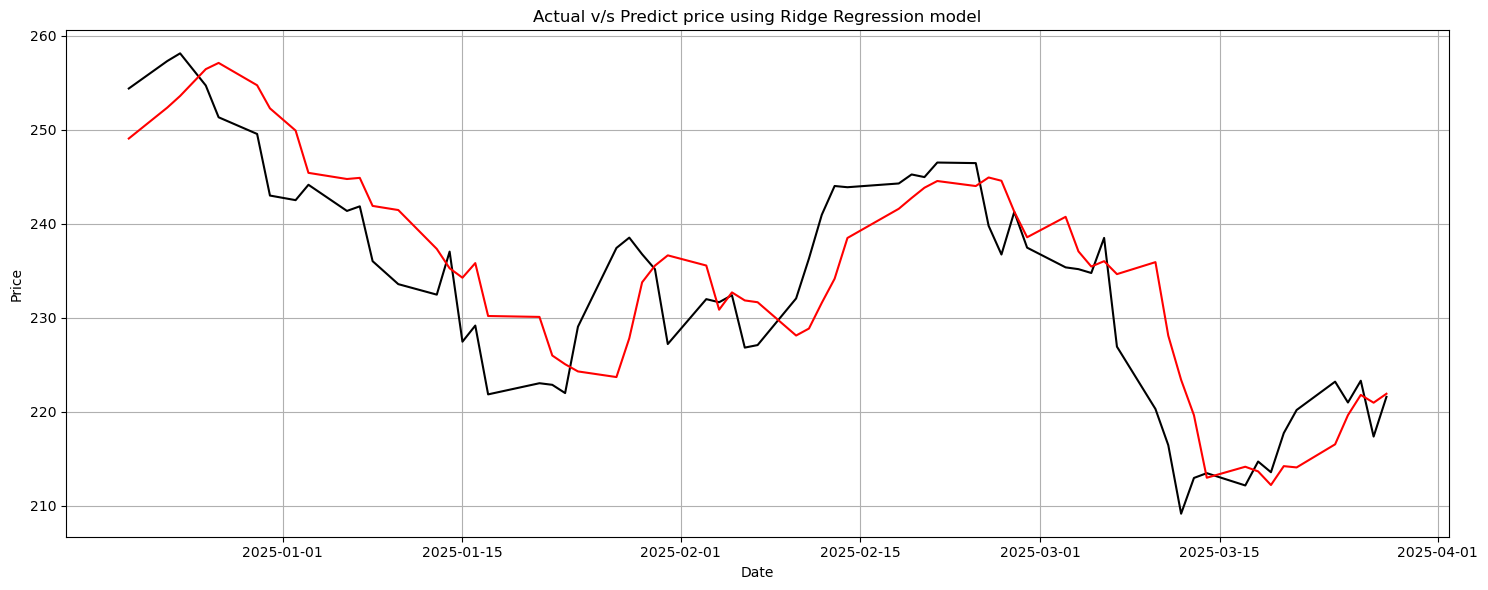

In [54]:
# 8. Plot the graph between Actual and Predicted Prices

plt.figure(figsize = (15,6))
plt.plot(last.index, last['Actual'], label = 'Actual', color = 'Black')
plt.plot(last.index, last['Predict'], label = 'Predict', color = 'Red')
plt.title('Actual v/s Predict price using Ridge Regression model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()

In [58]:
# 9. Evaluate the model - R Square, Mse, RMSE

r2 = r2_score(Y_test, y_pred)
print('R2 =', r2)

mse = mean_squared_error(Y_test, y_pred)
print('MSE =', mse)

rmse = np.sqrt(mse)
print('RMSE =', rmse)

R2 = 0.744335577696486
MSE = 35.98799363531089
RMSE = 5.998999386173572
